In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import scipy

In [2]:
from sklearn import metrics, model_selection, preprocessing, ensemble, tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score 
from sklearn.metrics import confusion_matrix

In [3]:
from Classification import model_fit, plot_confusion_matrix, model_fit2, plot_prob, get_precision_recall
from PlottingFunction import lda_1Dplot, plotModel, data_1Dplot

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
heart = pd.read_csv('FinalHeart.csv')
heart.drop(['Unnamed: 0'],axis=1,inplace=True)
heartPCA = pd.read_csv('PCAData.csv')
heartPCA.drop(['Unnamed: 0'],axis=1, inplace=True)
heartPCA['num'] = heart.num
heartICA = pd.read_csv('ICAData.csv')
heartICA.drop(['Unnamed: 0'],axis=1, inplace=True)
heartICA['num'] = heart.num
heartFactor = pd.read_csv('FactorData.csv')
heartFactor.drop(['Unnamed: 0'],axis=1, inplace=True)
heartFactor['num'] = heart.num

In [6]:
X = heart.drop(['num'],axis=1).copy()
Y = heart.num.copy()
XPCA = heartPCA.drop(['num'],axis=1).copy()
YPCA = heartPCA.num.copy()
XICA = heartICA.drop(['num'],axis=1).copy()
YICA = heartICA.num.copy()
XFactor = heartFactor.drop(['num'],axis=1).copy()
YFactor = heartFactor.num.copy()

In [7]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.33, stratify=Y)
X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled = train_test_split(SC.fit_transform(X),Y, test_size= 0.33, stratify=Y)
X_train_PCA, X_test_PCA, Y_train_PCA, Y_test_PCA = train_test_split(XPCA, YPCA, test_size = 0.33, random_state=144, shuffle=True, stratify = Y)
X_train_ICA, X_test_ICA, Y_train_ICA, Y_test_ICA = train_test_split(XICA, YICA, test_size = 0.33, random_state=144, shuffle=True, stratify = Y)
X_train_F, X_test_F, Y_train_F, Y_test_F = train_test_split(XFactor, YFactor, test_size = 0.33, random_state=144, shuffle=True, stratify = Y)

In [9]:
from sklearn.ensemble import GradientBoostingClassifier

In [10]:
gbc = GradientBoostingClassifier()

In [11]:
gbc.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [12]:
gbc = GradientBoostingClassifier()
model_fit2(gbc, X_train, X_test, Y_train, Y_test)

GradientBoostingClassifier

Train score is :0.979
Test score is :0.651


In [13]:
gbc = GradientBoostingClassifier()
model_fit2(gbc, X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled)

GradientBoostingClassifier

Train score is :0.985
Test score is :0.605


In [14]:
gbc = GradientBoostingClassifier()
model_fit2(gbc, X_train_PCA, X_test_PCA, Y_train_PCA, Y_test_PCA)

GradientBoostingClassifier

Train score is :1.0
Test score is :0.643


In [15]:
gbc = GradientBoostingClassifier()
model_fit2(gbc, X_train_ICA, X_test_ICA, Y_train_ICA, Y_test_ICA)

GradientBoostingClassifier

Train score is :0.998
Test score is :0.63


In [16]:
gbc = GradientBoostingClassifier()
model_fit2(gbc, X_train_F, X_test_F, Y_train_F, Y_test_F)

GradientBoostingClassifier

Train score is :0.992
Test score is :0.639


In [17]:
min_samples_split = np.arange(2,20,5)
min_weight_fraction_leaf = [0.1, 0.3,0.5,0.7,0.9]
max_depth      = np.arange(1,20, 5)
max_features = list(['auto','sqrt'])
ccp_alpha  = [1,10,100]

n_estimators  = 100
n_jobs = -1
random_state = 144

In [18]:
gbc_grid = GradientBoostingClassifier(verbose=1)
gbc_grid.set_params(random_state = 144, n_estimators = 100)

param_grid = {'min_samples_split': min_samples_split, 'min_weight_fraction_leaf':min_weight_fraction_leaf, 
              'max_depth':max_depth, 'max_features':max_features}

gbc_grid = GridSearchCV(gbc_grid, param_grid, cv = 3, return_train_score=True)

%time gbc_grid.fit(X_train, Y_train)

      Iter       Train Loss   Remaining Time 
         1           1.1882            0.29s
         2           1.1509            0.34s
         3           1.1191            0.32s
         4           1.0914            0.34s
         5           1.0684            0.34s
         6           1.0482            0.33s
         7           1.0312            0.33s
         8           1.0152            0.32s
         9           1.0005            0.31s
        10           0.9878            0.32s
        20           0.8913            0.25s
        30           0.8340            0.20s
        40           0.7959            0.18s
        50           0.7686            0.13s
        60           0.7461            0.11s
        70           0.7284            0.09s
        80           0.7137            0.06s
        90           0.7005            0.03s
       100           0.6897            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.1835            0.27s
        

        70           0.7284            0.09s
        80           0.7137            0.06s
        90           0.7005            0.03s
       100           0.6897            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.1835            0.28s
         2           1.1440            0.29s
         3           1.1122            0.28s
         4           1.0856            0.29s
         5           1.0633            0.28s
         6           1.0444            0.28s
         7           1.0267            0.28s
         8           1.0107            0.27s
         9           0.9966            0.27s
        10           0.9829            0.28s
        20           0.8915            0.23s
        30           0.8364            0.19s
        40           0.7981            0.16s
        50           0.7700            0.14s
        60           0.7494            0.11s
        70           0.7323            0.08s
        80           0.7188            0.05s
        9

        70           0.7284            0.08s
        80           0.7137            0.05s
        90           0.7005            0.03s
       100           0.6897            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.1835            0.58s
         2           1.1440            0.43s
         3           1.1122            0.38s
         4           1.0856            0.38s
         5           1.0633            0.34s
         6           1.0444            0.32s
         7           1.0267            0.31s
         8           1.0107            0.30s
         9           0.9966            0.31s
        10           0.9829            0.29s
        20           0.8915            0.20s
        30           0.8364            0.19s
        40           0.7981            0.15s
        50           0.7700            0.13s
        60           0.7494            0.10s
        70           0.7323            0.08s
        80           0.7188            0.05s
        9

        40           0.7959            0.14s
        50           0.7686            0.12s
        60           0.7461            0.09s
        70           0.7284            0.07s
        80           0.7137            0.05s
        90           0.7005            0.02s
       100           0.6897            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.1835            0.43s
         2           1.1440            0.33s
         3           1.1122            0.29s
         4           1.0856            0.27s
         5           1.0633            0.28s
         6           1.0444            0.26s
         7           1.0267            0.24s
         8           1.0107            0.23s
         9           0.9966            0.23s
        10           0.9829            0.24s
        20           0.8915            0.20s
        30           0.8364            0.16s
        40           0.7981            0.15s
        50           0.7700            0.12s
        6

       100           0.6938            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.1939            0.29s
         2           1.1767            0.24s
         3           1.1527            0.22s
         4           1.1283            0.21s
         5           1.1024            0.21s
         6           1.0846            0.21s
         7           1.0643            0.21s
         8           1.0476            0.21s
         9           1.0281            0.20s
        10           1.0145            0.20s
        20           0.9104            0.17s
        30           0.8505            0.15s
        40           0.8097            0.12s
        50           0.7797            0.10s
        60           0.7574            0.08s
        70           0.7386            0.06s
        80           0.7245            0.04s
        90           0.7131            0.02s
       100           0.7020            0.00s
      Iter       Train Loss   Remaining Time 
        

       100           0.6938            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.1939            0.20s
         2           1.1767            0.20s
         3           1.1527            0.19s
         4           1.1283            0.19s
         5           1.1024            0.19s
         6           1.0846            0.19s
         7           1.0643            0.19s
         8           1.0476            0.18s
         9           1.0281            0.18s
        10           1.0145            0.18s
        20           0.9104            0.10s
        30           0.8505            0.13s
        40           0.8097            0.11s
        50           0.7797            0.09s
        60           0.7574            0.07s
        70           0.7386            0.05s
        80           0.7245            0.04s
        90           0.7131            0.02s
       100           0.7020            0.00s
      Iter       Train Loss   Remaining Time 
        

        90           0.7056            0.02s
       100           0.6938            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.1939            0.20s
         2           1.1767            0.25s
         3           1.1527            0.23s
         4           1.1283            0.22s
         5           1.1024            0.23s
         6           1.0846            0.21s
         7           1.0643            0.21s
         8           1.0476            0.22s
         9           1.0281            0.22s
        10           1.0145            0.21s
        20           0.9104            0.18s
        30           0.8505            0.14s
        40           0.8097            0.11s
        50           0.7797            0.11s
        60           0.7574            0.09s
        70           0.7386            0.06s
        80           0.7245            0.04s
        90           0.7131            0.02s
       100           0.7020            0.00s
      Ite

      Iter       Train Loss   Remaining Time 
         1           1.1939            0.20s
         2           1.1767            0.24s
         3           1.1527            0.24s
         4           1.1283            0.25s
         5           1.1024            0.24s
         6           1.0846            0.24s
         7           1.0643            0.23s
         8           1.0476            0.24s
         9           1.0281            0.23s
        10           1.0145            0.22s
        20           0.9104            0.17s
        30           0.8505            0.14s
        40           0.8097            0.14s
        50           0.7797            0.11s
        60           0.7574            0.08s
        70           0.7386            0.06s
        80           0.7245            0.04s
        90           0.7131            0.02s
       100           0.7020            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.1955            0.20s
        

      Iter       Train Loss   Remaining Time 
         1           1.1536            0.40s
         2           1.0904            0.49s
         3           1.0385            0.45s
         4           0.9913            0.46s
         5           0.9533            0.46s
         6           0.9196            0.44s
         7           0.8909            0.44s
         8           0.8666            0.44s
         9           0.8418            0.42s
        10           0.8200            0.40s
        20           0.6565            0.37s
        30           0.5436            0.33s
        40           0.4617            0.28s
        50           0.3943            0.23s
        60           0.3406            0.18s
        70           0.2958            0.13s
        80           0.2583            0.09s
        90           0.2266            0.04s
       100           0.2001            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.1636            0.34s
        

       100           0.1684            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.1536            0.41s
         2           1.0904            0.39s
         3           1.0385            0.47s
         4           0.9913            0.40s
         5           0.9533            0.38s
         6           0.9196            0.38s
         7           0.8909            0.42s
         8           0.8666            0.37s
         9           0.8418            0.38s
        10           0.8200            0.38s
        20           0.6565            0.33s
        30           0.5436            0.28s
        40           0.4617            0.23s
        50           0.3943            0.21s
        60           0.3406            0.17s
        70           0.2958            0.13s
        80           0.2583            0.08s
        90           0.2266            0.04s
       100           0.2001            0.00s
      Iter       Train Loss   Remaining Time 
        

        90           0.1932            0.04s
       100           0.1684            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.1536            1.04s
         2           1.0904            0.65s
         3           1.0385            0.53s
         4           0.9913            0.49s
         5           0.9533            0.54s
         6           0.9196            0.48s
         7           0.8909            0.45s
         8           0.8666            0.45s
         9           0.8418            0.47s
        10           0.8200            0.43s
        20           0.6565            0.39s
        30           0.5436            0.32s
        40           0.4617            0.27s
        50           0.3943            0.22s
        60           0.3406            0.18s
        70           0.2958            0.13s
        80           0.2583            0.09s
        90           0.2266            0.04s
       100           0.2001            0.00s
      Ite

        50           0.3491            0.19s
        60           0.2956            0.16s
        70           0.2554            0.12s
        80           0.2225            0.08s
        90           0.1932            0.04s
       100           0.1684            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.1536            0.39s
         2           1.0904            0.39s
         3           1.0385            0.39s
         4           0.9913            0.39s
         5           0.9533            0.38s
         6           0.9196            0.38s
         7           0.8909            0.37s
         8           0.8666            0.37s
         9           0.8418            0.36s
        10           0.8200            0.36s
        20           0.6565            0.31s
        30           0.5436            0.27s
        40           0.4617            0.23s
        50           0.3943            0.19s
        60           0.3406            0.16s
        7

        80           0.3387            0.06s
        90           0.3077            0.03s
       100           0.2787            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.1674            1.05s
         2           1.1271            0.62s
         3           1.0697            0.47s
         4           1.0293            0.41s
         5           0.9929            0.38s
         6           0.9629            0.36s
         7           0.9366            0.36s
         8           0.9099            0.34s
         9           0.8864            0.34s
        10           0.8696            0.33s
        20           0.7095            0.25s
        30           0.6140            0.22s
        40           0.5448            0.20s
        50           0.4909            0.17s
        60           0.4430            0.13s
        70           0.4009            0.10s
        80           0.3643            0.06s
        90           0.3321            0.03s
       10

        50           0.4674            0.15s
        60           0.4148            0.12s
        70           0.3740            0.09s
        80           0.3387            0.06s
        90           0.3077            0.03s
       100           0.2787            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.1674            0.20s
         2           1.1271            0.27s
         3           1.0697            0.29s
         4           1.0293            0.31s
         5           0.9929            0.30s
         6           0.9629            0.30s
         7           0.9366            0.29s
         8           0.9099            0.29s
         9           0.8864            0.28s
        10           0.8696            0.28s
        20           0.7095            0.23s
        30           0.6140            0.18s
        40           0.5448            0.17s
        50           0.4909            0.15s
        60           0.4430            0.12s
        7

        80           0.3387            0.06s
        90           0.3077            0.03s
       100           0.2787            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.1674            0.30s
         2           1.1271            0.29s
         3           1.0697            0.30s
         4           1.0293            0.30s
         5           0.9929            0.27s
         6           0.9629            0.26s
         7           0.9366            0.26s
         8           0.9099            0.27s
         9           0.8864            0.27s
        10           0.8696            0.28s
        20           0.7095            0.20s
        30           0.6140            0.20s
        40           0.5448            0.17s
        50           0.4909            0.15s
        60           0.4430            0.12s
        70           0.4009            0.09s
        80           0.3643            0.06s
        90           0.3321            0.03s
       10

        60           0.4148            0.13s
        70           0.3740            0.09s
        80           0.3387            0.06s
        90           0.3077            0.03s
       100           0.2787            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.1674            0.30s
         2           1.1271            0.29s
         3           1.0697            0.26s
         4           1.0293            0.27s
         5           0.9929            0.27s
         6           0.9629            0.29s
         7           0.9366            0.29s
         8           0.9099            0.27s
         9           0.8864            0.27s
        10           0.8696            0.26s
        20           0.7095            0.25s
        30           0.6140            0.18s
        40           0.5448            0.19s
        50           0.4909            0.16s
        60           0.4430            0.13s
        70           0.4009            0.10s
        8

        50           0.3439            0.22s
        60           0.2905            0.18s
        70           0.2501            0.13s
        80           0.2153            0.09s
        90           0.1868            0.04s
       100           0.1637            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.1536            0.39s
         2           1.0904            0.39s
         3           1.0385            0.42s
         4           0.9913            0.41s
         5           0.9533            0.42s
         6           0.9196            0.41s
         7           0.8909            0.41s
         8           0.8666            0.40s
         9           0.8418            0.40s
        10           0.8200            0.40s
        20           0.6562            0.39s
        30           0.5437            0.33s
        40           0.4598            0.28s
        50           0.3925            0.23s
        60           0.3388            0.18s
        7

        30           0.4986            0.36s
        40           0.4129            0.30s
        50           0.3439            0.25s
        60           0.2905            0.19s
        70           0.2501            0.15s
        80           0.2153            0.10s
        90           0.1868            0.05s
       100           0.1637            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.1536            0.43s
         2           1.0904            0.53s
         3           1.0385            0.50s
         4           0.9913            0.46s
         5           0.9533            0.52s
         6           0.9196            0.51s
         7           0.8909            0.51s
         8           0.8666            0.49s
         9           0.8418            0.47s
        10           0.8200            0.46s
        20           0.6562            0.38s
        30           0.5437            0.32s
        40           0.4598            0.29s
        5

         9           0.8384            0.60s
        10           0.8115            0.58s
        20           0.6160            0.48s
        30           0.4986            0.42s
        40           0.4129            0.36s
        50           0.3439            0.29s
        60           0.2905            0.23s
        70           0.2501            0.17s
        80           0.2153            0.11s
        90           0.1868            0.06s
       100           0.1637            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.1536            0.51s
         2           1.0904            0.54s
         3           1.0385            0.52s
         4           0.9913            0.52s
         5           0.9533            0.51s
         6           0.9196            0.51s
         7           0.8909            0.49s
         8           0.8666            0.47s
         9           0.8418            0.45s
        10           0.8200            0.44s
        2

        40           0.4129            0.29s
        50           0.3439            0.24s
        60           0.2905            0.19s
        70           0.2501            0.14s
        80           0.2153            0.09s
        90           0.1868            0.05s
       100           0.1637            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.1536            0.47s
         2           1.0904            0.42s
         3           1.0385            0.42s
         4           0.9913            0.44s
         5           0.9533            0.43s
         6           0.9196            0.45s
         7           0.8909            0.43s
         8           0.8666            0.43s
         9           0.8418            0.42s
        10           0.8200            0.41s
        20           0.6562            0.36s
        30           0.5437            0.31s
        40           0.4598            0.27s
        50           0.3925            0.22s
        6

        60           0.4143            0.15s
        70           0.3740            0.11s
        80           0.3387            0.07s
        90           0.3071            0.04s
       100           0.2776            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.1674            0.31s
         2           1.1271            0.30s
         3           1.0697            0.27s
         4           1.0293            0.27s
         5           0.9929            0.27s
         6           0.9629            0.27s
         7           0.9366            0.28s
         8           0.9099            0.28s
         9           0.8864            0.28s
        10           0.8696            0.28s
        20           0.7095            0.25s
        30           0.6140            0.22s
        40           0.5447            0.19s
        50           0.4902            0.16s
        60           0.4416            0.12s
        70           0.3990            0.09s
        8

        50           0.4674            0.16s
        60           0.4143            0.13s
        70           0.3740            0.09s
        80           0.3387            0.06s
        90           0.3071            0.03s
       100           0.2776            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.1674            0.30s
         2           1.1271            0.29s
         3           1.0697            0.28s
         4           1.0293            0.30s
         5           0.9929            0.30s
         6           0.9629            0.30s
         7           0.9366            0.31s
         8           0.9099            0.31s
         9           0.8864            0.30s
        10           0.8696            0.31s
        20           0.7095            0.26s
        30           0.6140            0.23s
        40           0.5447            0.19s
        50           0.4902            0.16s
        60           0.4416            0.13s
        7

        40           0.5254            0.20s
        50           0.4674            0.17s
        60           0.4143            0.13s
        70           0.3740            0.10s
        80           0.3387            0.07s
        90           0.3071            0.04s
       100           0.2776            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.1674            0.30s
         2           1.1271            0.29s
         3           1.0697            0.39s
         4           1.0293            0.39s
         5           0.9929            0.38s
         6           0.9629            0.36s
         7           0.9366            0.35s
         8           0.9099            0.34s
         9           0.8864            0.34s
        10           0.8696            0.33s
        20           0.7095            0.30s
        30           0.6140            0.27s
        40           0.5447            0.24s
        50           0.4902            0.20s
        6

        60           0.4143            0.13s
        70           0.3740            0.09s
        80           0.3387            0.06s
        90           0.3071            0.03s
       100           0.2776            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.1674            0.29s
         2           1.1271            0.29s
         3           1.0697            0.27s
         4           1.0293            0.27s
         5           0.9929            0.27s
         6           0.9629            0.27s
         7           0.9366            0.27s
         8           0.9099            0.27s
         9           0.8864            0.26s
        10           0.8696            0.26s
        20           0.7095            0.23s
        30           0.6140            0.20s
        40           0.5447            0.17s
        50           0.4902            0.14s
        60           0.4416            0.11s
        70           0.3990            0.09s
        8

        20           0.6160            0.38s
        30           0.4986            0.34s
        40           0.4129            0.29s
        50           0.3439            0.24s
        60           0.2905            0.19s
        70           0.2501            0.14s
        80           0.2153            0.09s
        90           0.1868            0.05s
       100           0.1637            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.1536            0.41s
         2           1.0904            0.44s
         3           1.0385            0.45s
         4           0.9913            0.43s
         5           0.9533            0.44s
         6           0.9196            0.47s
         7           0.8909            0.47s
         8           0.8666            0.46s
         9           0.8418            0.44s
        10           0.8200            0.44s
        20           0.6562            0.38s
        30           0.5437            0.33s
        4

        40           0.4129            0.28s
        50           0.3439            0.23s
        60           0.2905            0.18s
        70           0.2501            0.14s
        80           0.2153            0.09s
        90           0.1868            0.05s
       100           0.1637            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.1536            0.38s
         2           1.0904            0.43s
         3           1.0385            0.45s
         4           0.9913            0.45s
         5           0.9533            0.43s
         6           0.9196            0.44s
         7           0.8909            0.43s
         8           0.8666            0.42s
         9           0.8418            0.41s
        10           0.8200            0.41s
        20           0.6562            0.37s
        30           0.5437            0.32s
        40           0.4598            0.28s
        50           0.3925            0.23s
        6

        30           0.4986            0.33s
        40           0.4129            0.28s
        50           0.3439            0.23s
        60           0.2905            0.19s
        70           0.2501            0.14s
        80           0.2153            0.09s
        90           0.1868            0.05s
       100           0.1637            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.1536            0.49s
         2           1.0904            0.44s
         3           1.0385            0.43s
         4           0.9913            0.43s
         5           0.9533            0.42s
         6           0.9196            0.42s
         7           0.8909            0.41s
         8           0.8666            0.41s
         9           0.8418            0.41s
        10           0.8200            0.41s
        20           0.6562            0.36s
        30           0.5437            0.32s
        40           0.4598            0.28s
        5

         8           0.8633            0.43s
         9           0.8384            0.42s
        10           0.8115            0.42s
        20           0.6160            0.36s
        30           0.4986            0.32s
        40           0.4129            0.28s
        50           0.3439            0.23s
        60           0.2905            0.18s
        70           0.2501            0.13s
        80           0.2153            0.09s
        90           0.1868            0.04s
       100           0.1637            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.1536            0.53s
         2           1.0904            0.44s
         3           1.0385            0.47s
         4           0.9913            0.46s
         5           0.9533            0.46s
         6           0.9196            0.44s
         7           0.8909            0.45s
         8           0.8666            0.45s
         9           0.8418            0.46s
        1

        60           0.4143            0.14s
        70           0.3740            0.10s
        80           0.3387            0.07s
        90           0.3071            0.03s
       100           0.2776            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.1674            0.37s
         2           1.1271            0.29s
         3           1.0697            0.29s
         4           1.0293            0.31s
         5           0.9929            0.30s
         6           0.9629            0.30s
         7           0.9366            0.31s
         8           0.9099            0.30s
         9           0.8864            0.31s
        10           0.8696            0.31s
        20           0.7095            0.27s
        30           0.6140            0.24s
        40           0.5447            0.20s
        50           0.4902            0.17s
        60           0.4416            0.13s
        70           0.3990            0.10s
        8

        30           0.5950            0.24s
        40           0.5254            0.20s
        50           0.4674            0.17s
        60           0.4143            0.13s
        70           0.3740            0.10s
        80           0.3387            0.07s
        90           0.3071            0.03s
       100           0.2776            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.1674            0.30s
         2           1.1271            0.39s
         3           1.0697            0.40s
         4           1.0293            0.41s
         5           0.9929            0.44s
         6           0.9629            0.42s
         7           0.9366            0.41s
         8           0.9099            0.40s
         9           0.8864            0.39s
        10           0.8696            0.37s
        20           0.7095            0.30s
        30           0.6140            0.25s
        40           0.5447            0.21s
        5

        60           0.4143            0.14s
        70           0.3740            0.10s
        80           0.3387            0.07s
        90           0.3071            0.03s
       100           0.2776            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.1674            0.90s
         2           1.1271            0.60s
         3           1.0697            0.49s
         4           1.0293            0.45s
         5           0.9929            0.44s
         6           0.9629            0.41s
         7           0.9366            0.40s
         8           0.9099            0.38s
         9           0.8864            0.36s
        10           0.8696            0.36s
        20           0.7095            0.29s
        30           0.6140            0.26s
        40           0.5447            0.22s
        50           0.4902            0.18s
        60           0.4416            0.15s
        70           0.3990            0.12s
        8

        60           0.4143            0.14s
        70           0.3740            0.10s
        80           0.3387            0.07s
        90           0.3071            0.03s
       100           0.2776            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.1674            0.32s
         2           1.1271            0.36s
         3           1.0697            0.37s
         4           1.0293            0.37s
         5           0.9929            0.38s
         6           0.9629            0.34s
         7           0.9366            0.37s
         8           0.9099            0.37s
         9           0.8864            0.35s
        10           0.8696            0.35s
        20           0.7095            0.29s
        30           0.6140            0.25s
        40           0.5447            0.21s
        50           0.4902            0.17s
        60           0.4416            0.13s
        70           0.3990            0.10s
        8

        90           0.7941            0.03s
       100           0.7863            0.00s
CPU times: total: 1min 25s
Wall time: 1min 23s


GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(random_state=144, verbose=1),
             param_grid={'max_depth': array([ 1,  6, 11, 16]),
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': array([ 2,  7, 12, 17]),
                         'min_weight_fraction_leaf': [0.1, 0.3, 0.5, 0.7, 0.9]},
             return_train_score=True)

In [19]:
gbc_df = pd.DataFrame(gbc_grid.cv_results_)
gbc_df.shape

(160, 20)

In [20]:
gbc_df.dropna(axis = 0, how = 'any', inplace=True)
gbc_df.shape

(96, 20)

In [21]:
gbc_final_df = gbc_df.loc[:,['param_max_depth','param_max_features','param_min_samples_split',
                             'param_min_weight_fraction_leaf','mean_train_score','mean_test_score']]

In [22]:
gbc_final_df['diff'] = abs(gbc_final_df['mean_train_score']-gbc_final_df['mean_test_score'])

In [23]:
gbc_final_df.to_csv('GradientBoosting.csv')

In [24]:
gbc_final_df.loc[:,['mean_train_score','mean_test_score']].max()

mean_train_score    0.992731
mean_test_score     0.643181
dtype: float64

In [25]:
print('Training score is :' + str(np.round(gbc_grid.best_estimator_.score(X_train, Y_train),2)))
print('Testing  score is :' + str(np.round(gbc_grid.best_estimator_.score(X_test, Y_test),2)))

Training score is :0.66
Testing  score is :0.62


In [ ]:
#gbc_final_df.loc[gbc_final_df['diff']<=min(gbc_final_df['diff'])+.05,:].sort_values(by='diff',ascending=True).iloc[20:,:]

In [26]:
gbc = GradientBoostingClassifier()
gbc.set_params(random_state = 144, n_estimators = 5000, max_features = 5, max_depth = 5, min_samples_split = 25, 
              min_weight_fraction_leaf = 0.05, ccp_alpha = 1e-2)
model_fit2(gbc, X_train, X_test, Y_train, Y_test)

GradientBoostingClassifier

Train score is :0.656
Test score is :0.643


In [27]:
gbc = GradientBoostingClassifier()
gbc.set_params(random_state = 144, n_estimators = 5000, max_features = 5, max_depth = 5, min_samples_split = 25, 
              min_weight_fraction_leaf = 0.05, ccp_alpha = 1e-2)
model_fit2(gbc, X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled)

GradientBoostingClassifier

Train score is :0.643
Test score is :0.647


In [28]:
gbc = GradientBoostingClassifier()
gbc.set_params(random_state = 144, n_estimators = 5000, max_features = 5, max_depth = 5, min_samples_split = 25, 
              min_weight_fraction_leaf = 0.05, ccp_alpha = 1e-2)
model_fit2(gbc, X_train_PCA, X_test_PCA, Y_train_PCA, Y_test_PCA)

GradientBoostingClassifier

Train score is :0.637
Test score is :0.618


In [29]:
gbc = GradientBoostingClassifier()
gbc.set_params(random_state = 144, n_estimators = 5000, max_features = 5, max_depth = 5, min_samples_split = 25, 
              min_weight_fraction_leaf = 0.05, ccp_alpha = 1e-2)
model_fit2(gbc, X_train_ICA, X_test_ICA, Y_train_ICA, Y_test_ICA)

GradientBoostingClassifier

Train score is :0.631
Test score is :0.639


In [30]:
gbc = GradientBoostingClassifier()
gbc.set_params(random_state = 144, n_estimators = 5000, max_features = 5, max_depth = 5, min_samples_split = 25, 
              min_weight_fraction_leaf = 0.05, ccp_alpha = 1e-2)
model_fit2(gbc, X_train_F, X_test_F, Y_train_F, Y_test_F)

GradientBoostingClassifier

Train score is :0.631
Test score is :0.634


In [32]:
gbc = GradientBoostingClassifier()
gbc.set_params(random_state = 144, n_estimators = 5000, max_features = 5, max_depth = 5, min_samples_split = 25, 
              min_weight_fraction_leaf = 0.05, ccp_alpha = 1e-2)
gbc.fit(X_train_scaled, Y_train_scaled)
print(np.round(gbc.score(X_train_scaled, Y_train_scaled),2))
print(np.round(gbc.score(X_test_scaled, Y_test_scaled),2))

0.64
0.65


GradientBoostingClassifier


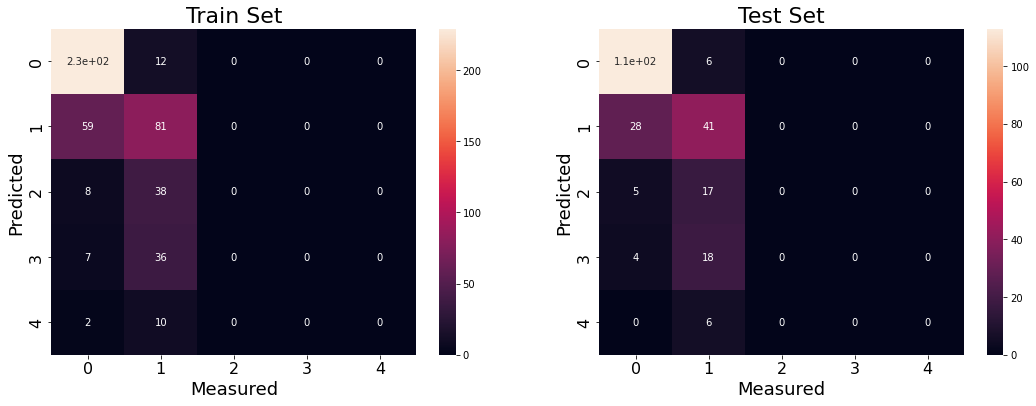

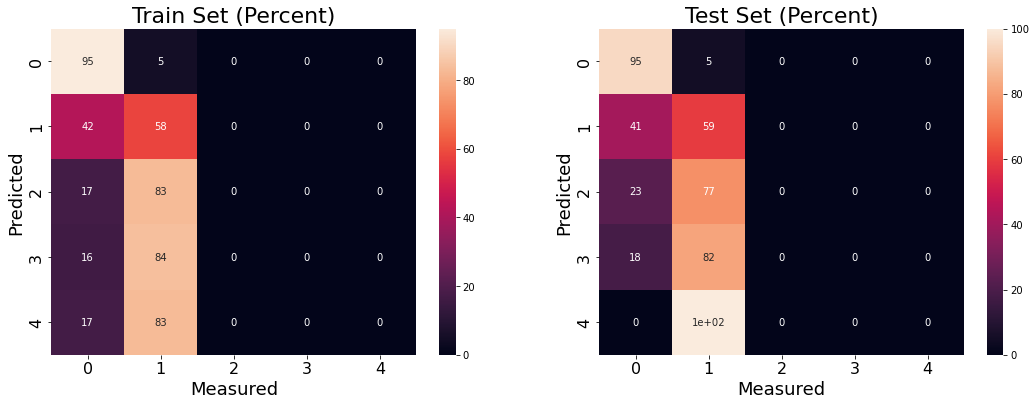

In [33]:
plot_confusion_matrix(gbc, X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled)

Precision score for training set is :0.75
Precision score for testing  set is :0.75
Recall score for training set is :0.95
Recall score for testing  set is :0.95
F1 score for training set is :0.84
F1 score for testing  set is :0.84
AUC for training set is :0.89
AUC for testing  set is :0.9


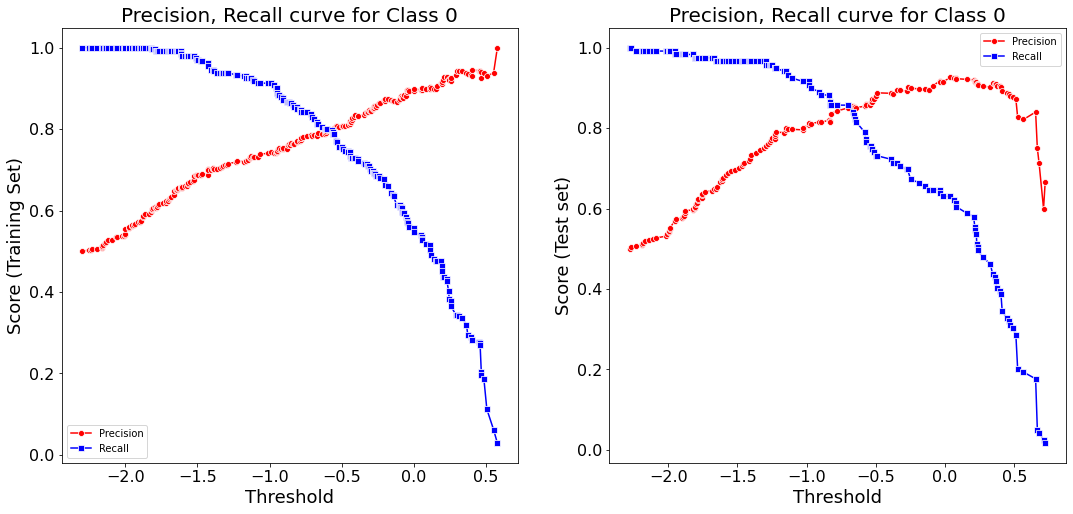

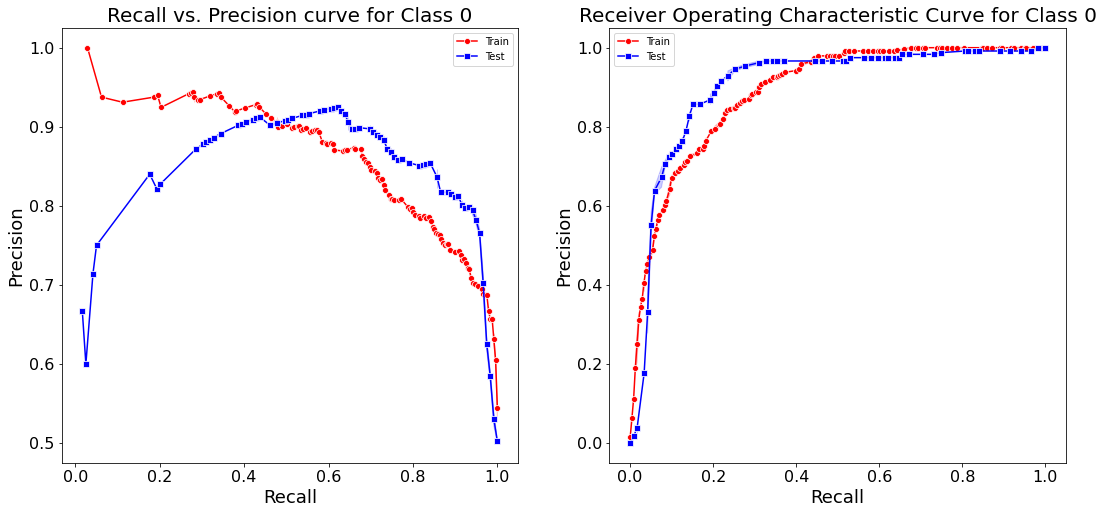

In [34]:
get_precision_recall(gbc, X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled, 0)

Precision score for training set is :0.0
Precision score for testing  set is :0.0
Recall score for training set is :0.0
Recall score for testing  set is :0.0
F1 score for training set is :0.0
F1 score for testing  set is :0.0
AUC for training set is :0.5
AUC for testing  set is :0.5


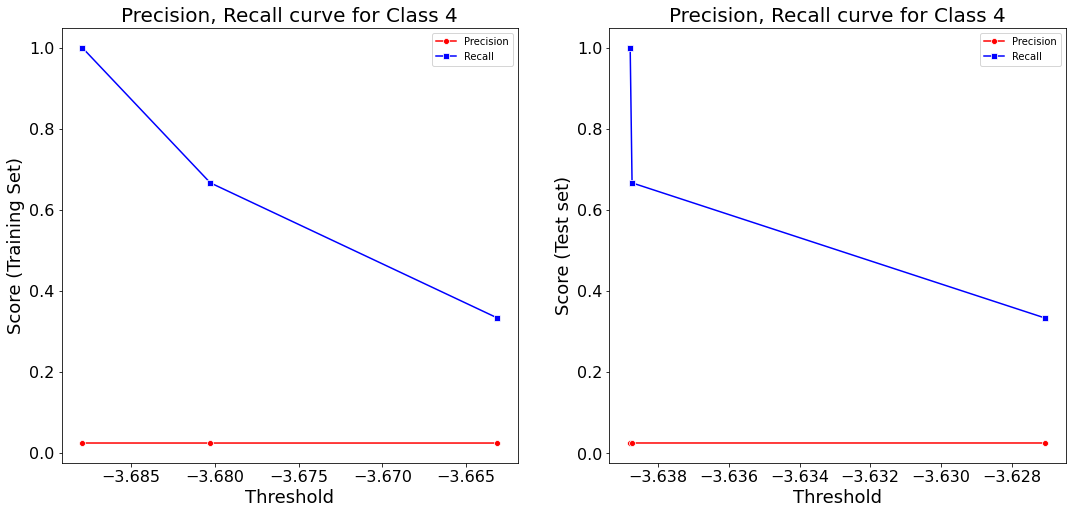

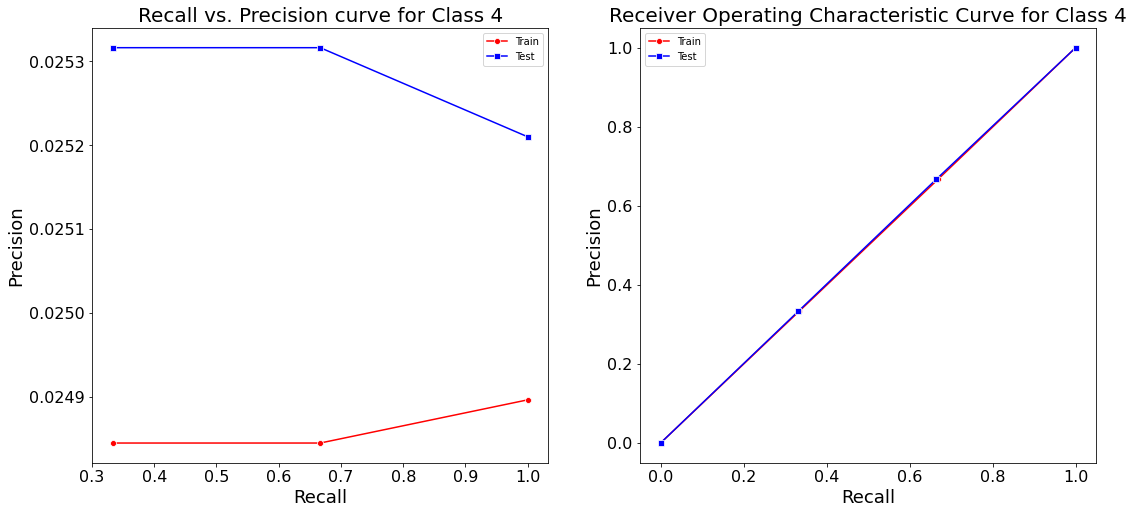

In [35]:
get_precision_recall(gbc, X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled, 4)